In [240]:
import math
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt

In [58]:
file_list = listdir('./daily_data')
file_list_recent = []
for file in file_list:
    if file.find("dec_21_2021") != -1:
        file_list_recent.append(file)
first = True

for file in file_list_recent:
    coin_name = file.split("-")[0]
    if first:
        price_df = pd.read_csv('./daily_data/' + file)
        price_df['coin'] = coin_name
        first = False
    else:
        new_df = pd.read_csv('./daily_data/' + file)
        new_df['coin'] = coin_name
        price_df = price_df.append(new_df)

price_df = price_df.drop('Unnamed: 0', 1)
price_df

/var/folders/gp/0bstcdf92msf4b130ztx6zs00000gn/T/ipykernel_44521/1362203716.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  price_df = price_df.drop('Unnamed: 0', 1)


,Date,Open,High,Low,Close,Volume,coin
0,2021-12-20,0.5898,0.6680,0.6483,0.6222,2.018799e+07,GRT
1,2021-12-19,0.6001,0.6677,0.6045,0.6482,1.903754e+07,GRT
2,2021-12-18,0.5810,0.6164,0.5894,0.6049,1.701290e+07,GRT
3,2021-12-17,0.5789,0.6284,0.6138,0.5896,1.869219e+07,GRT
4,2021-12-16,0.6123,0.6684,0.6400,0.6141,1.966700e+07,GRT
...,...,...,...,...,...,...,...
189,2021-06-14,92.3170,103.3730,98.3790,98.5560,4.567910e+04,MLN
190,2021-06-13,91.1510,109.1150,106.4590,97.8780,7.657807e+04,MLN
191,2021-06-12,78.8330,120.3010,85.6330,107.1090,1.208923e+05,MLN
192,2021-06-11,84.4970,108.0620,108.0620,84.5680,5.710109e+04,MLN


Data preprocessing to determine which coins to look at in the analysis. Ideally we want coins which have been around for a long time, and thus we can get enough training data. I will select the top 10 coins which have been around the longest

In [59]:
length_of_listing = price_df[['coin', 'Date']].groupby(by = 'coin').count()
length_of_listing = length_of_listing.nlargest(10, 'Date')

coins_to_trade = length_of_listing.index.to_list()

price_df = price_df[price_df['coin'].isin(coins_to_trade)]
price_df['Date'] = pd.to_datetime(price_df['Date'])
price_df_open = price_df[['Date', 'coin', 'Close']]
price_df_open = price_df.drop_duplicates()

price_df_long = price_df_open.pivot(index = 'Date', columns = 'coin', values = 'Close').dropna()

returns = price_df_long.pct_change()
cumul_returns = (1 + returns).cumprod() - 1

/var/folders/gp/0bstcdf92msf4b130ztx6zs00000gn/T/ipykernel_44521/1435192530.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['Date'] = pd.to_datetime(price_df['Date'])


Exploring initial metrics of the coins selected

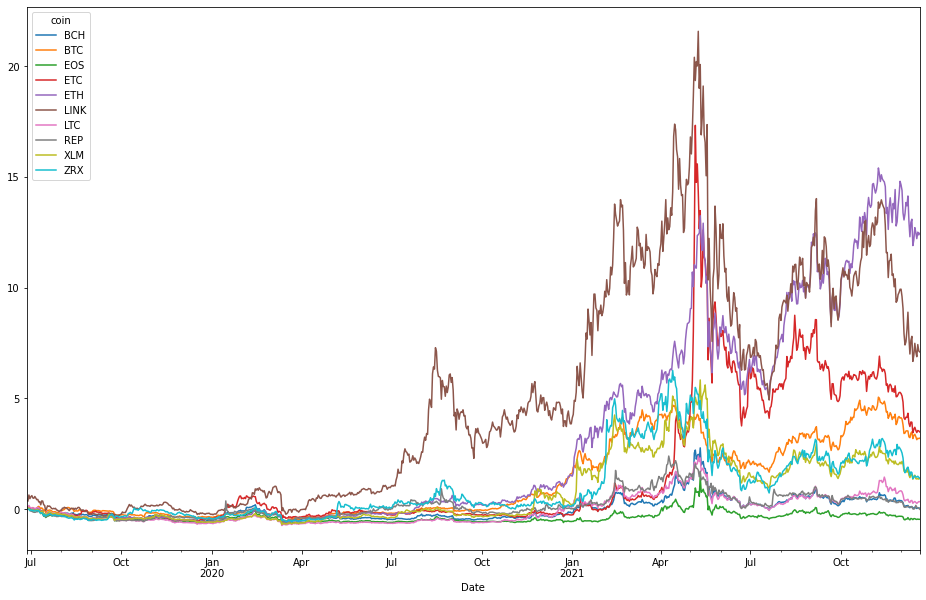

,abs_returns,avg_returns,std_returns,daily_sharpe,yearly_sharpe
coin,,,,,
ETH,12.446553,0.004260,0.051939,0.082022,1.567029
LINK,7.095525,0.004640,0.067968,0.068271,1.304310
BTC,3.205113,0.002431,0.040540,0.059957,1.145471
ETC,3.485714,0.003802,0.067248,0.056539,1.080185
ZRX,1.388282,0.003189,0.067530,0.047229,0.902299
XLM,1.399253,0.002994,0.066079,0.045315,0.865743
LTC,0.337684,0.001887,0.055223,0.034166,0.652746
REP,-0.003619,0.002550,0.077125,0.033068,0.631772
BCH,0.044978,0.001895,0.060704,0.031224,0.596534


In [65]:
plt.rcParams['figure.figsize'] = [16,10]
cumul_returns.plot()
plt.show()

abs_returns = ((price_df_long.iloc[-1] - price_df_long.iloc[0])/price_df_long.iloc[0]).rename("abs_returns")
avg_returns = returns.mean().rename("avg_returns")
std_returns = returns.std().rename("std_returns")

metric_df = pd.concat([abs_returns, avg_returns, std_returns], names=['abs_returns', 'avg_returns', 'std_returns'], axis=1)
metric_df['daily_sharpe'] = metric_df.avg_returns / metric_df.std_returns
# Using 365 to annualized (as compared to 252 trading days in year) because crypto markets are always open
metric_df['yearly_sharpe'] = metric_df.daily_sharpe * math.sqrt(365)
metric_df.sort_values('yearly_sharpe', ascending = False)

<AxesSubplot:xlabel='Date'>

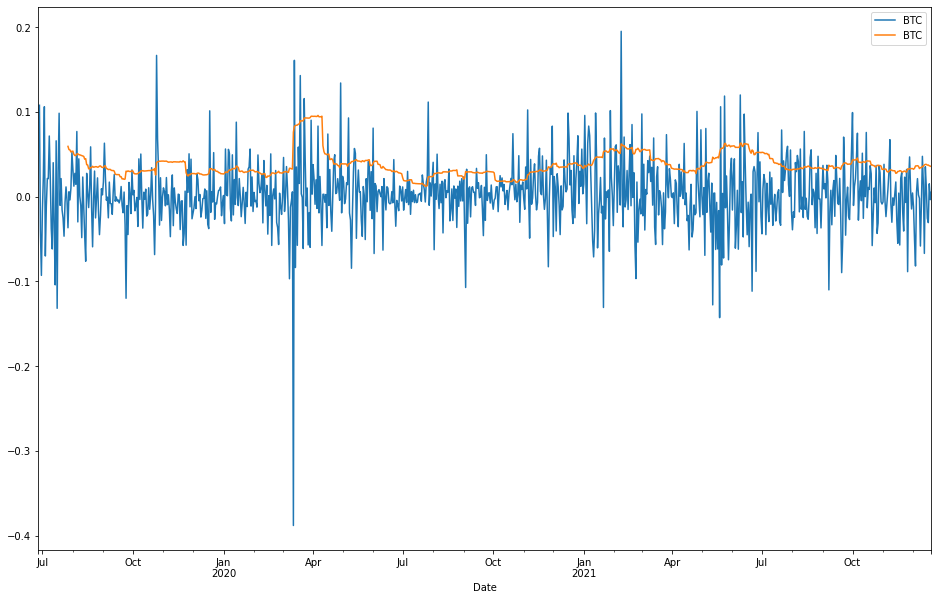

In [212]:
returns_subset = returns.BTC
returns_subset_std = returns.BTC.rolling(30).std()
merged = pd.concat([returns_subset, returns_subset_std], axis=1)
merged.plot()

In [163]:
ex_timeseries_2 = np.random.normal(loc = 0, scale=1, size = 100)


In [303]:
import wbs_utils

# ex_timeseries_2 = np.random.normal(loc = 0, scale=1, size = 100)
# print(ex_timeseries_2)
# print(cusum_stat(ex_timeseries_2, s=1, e=50, b=20))
# print(critical_val(ex_timeseries_2, c=1))
#print(gen_sub_samples(ex_timeseries_2))
#ex_timeseries_2 = np.random.normal(loc = 0, scale=1, size = 100)
#print(max_break_point(timeseries = ex_timeseries_2, s=1, e=49))

This section is validating that the wild binary segmentation algorithm is working correctly, and aligns relatively close with the results presented in Figure 1 of the WBS paper 

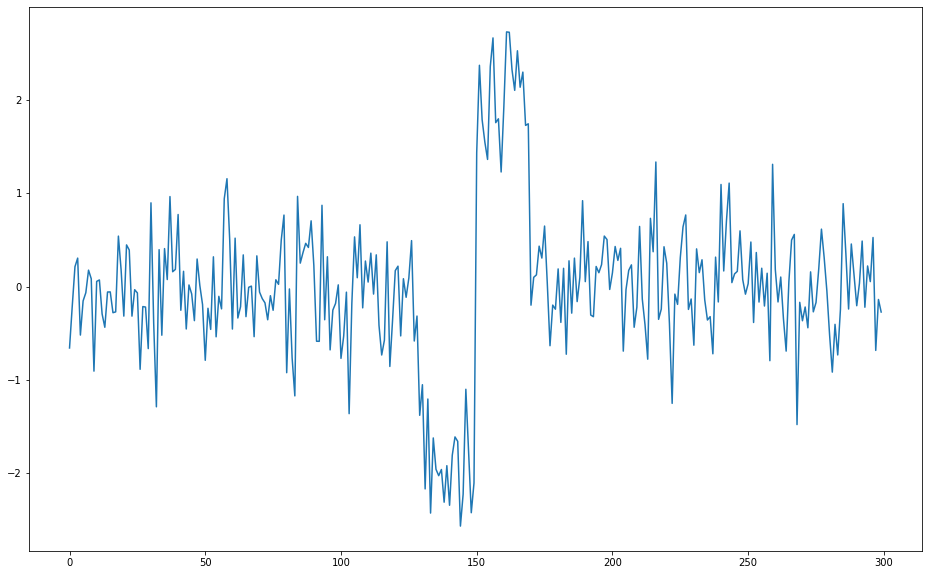

In [272]:
import wbs_utils

ex_subset_1 = np.random.normal(loc = 0, scale=0.5, size = 130)
ex_subset_2 = np.random.normal(loc = -2, scale=0.5, size = 20)
ex_subset_3 = np.random.normal(loc = 2, scale=0.5, size = 20)
ex_subset_4 = np.random.normal(loc = 0, scale=0.5, size = 130)   

ex_timeseries_test = np.concatenate((ex_subset_1, ex_subset_2, ex_subset_3, ex_subset_4))
timeseries_series = pd.Series(ex_timeseries_test)
timeseries_series.plot()
plt.show()

test_outputs = []

for i in range(100):
    ex_subset_1 = np.random.normal(loc = 0, scale=1, size = 130)
    ex_subset_2 = np.random.normal(loc = -2, scale=1, size = 20)
    ex_subset_3 = np.random.normal(loc = 2, scale=1, size = 20)
    ex_subset_4 = np.random.normal(loc = 0, scale=1, size = 130)   

    ex_timeseries_test = np.concatenate((ex_subset_1, ex_subset_2, ex_subset_3, ex_subset_4))
    
    break_point_output = max_break_point(ex_timeseries_test, s=0, e=len(ex_timeseries_test))
    break_point_output_break = break_point_output[0]
    test_outputs.append(break_point_output_break)

# occurances = collections.Counter(test_outputs)
# occurances

In [331]:
# Function to calculate the cumulative sum statistic defiend in the Wild Binary Segmentation Paper
def cusum_stat(timeseries, s, e, b):
    '''
        Returns the CUSUM statistic of a timeseries. This is defined on page 6, equation three of the WBS paper

                Parameters:
                        timeseries (nparray): A numpy array of the entire timeseries WBS is being run on
                        s (int): The index of where to start calculating the CUSUM statistic
                        e (int): The index of where to end calculating the CUSUM statistic
                        b (int): The breakpoint at which to calculate the CUSUM statistic

                Returns:
                        cusum_stat (float): The CUSUM statistic of the timseseries and paramater combinations
    '''
    timeseries_subset = timeseries[s:(e+1)]
    n = e - s + 1

    c_1 = math.sqrt((e - b) / (n * (b - s + 1)))
    c_2 = math.sqrt((b - s + 1) / (n * (e - b)))

    X_1 = c_1 * timeseries[s:(b+1)].cumsum()

    X_2 = -c_2 * timeseries[(b+1):(e+1)].cumsum()

    alt_weights = np.concatenate((X_1, X_2))

    cusum_stat = np.dot(alt_weights, timeseries_subset) 

    return cusum_stat

# Function to calculate the critical value of the test
def critical_val(timeseries, c):
    '''
        Returns the critical value of CUSUM test. This is defined on page 9, assumption 3.3 of the WBS paper

                Parameters:
                        timeseries (nparray): A numpy array of the entire timeseries WBS is being run on
                        c (float): parameter to be set by the user based on the dataset of 

                Returns:
                        critical_value (float): The critical value of the test
    '''
    return c * np.sqrt(2 * np.log(len(timeseries)))

# Function to calculate the subsamples which we use for the first loop of the WBS algo
def gen_sub_samples(s, e, m = 20):
    '''
    Returns sets of subsample indices to consdier within the larger WBS alo

            Parameters:
                    s (int): The index of where to start creating the subsamples
                    e (int): The index of where to end creating the subsamples
                    m (int): The number of subsamples to create
            Returns:
                    sub_samples (list): The list of subsamples to consider within WBS
    '''
    sub_samples = []
    while len(sub_samples) < m:
        end_pt_1 = round(np.random.uniform(low=s, high=e))
        end_pt_2 = round(np.random.uniform(low=s, high=e))

        if np.abs(end_pt_1 - end_pt_2) >= 15:
            sub_samples.append((min(end_pt_1, end_pt_2), max(end_pt_1, end_pt_2)))

    return sub_samples
    
# Function to find the breakpoint with the highest CUSUM statistic given the start and end points
def max_break_point(timeseries, s, e):
    '''
        Returns breakpoint index which maximizes the CUSUM statistic

                Parameters:
                        timeseries (nparray): A numpy array of the entire timeseries WBS is being run on
                        s (int): The index of where to start calculating the CUSUM statistic
                        e (int): The index of where to end calculating the CUSUM statistic

                Returns:
                        max_break_index (int): The breakpoint which maximizes the CUSUM statistic
                        max_cusum_stat (float): The CUSUM stat of the max_break_index
    '''
    max_cusum_stat = -math.inf
    max_break_index = None

    for i in range(s+1, e):
        cusum_result = cusum_stat(timeseries, s = s, e = e, b = i)
        if cusum_result > max_cusum_stat:
            max_cusum_stat = cusum_result
            max_break_index = i
    
    return max_break_index, max_cusum_stat

# TRIPLE CHECK THIS TO MAKE SURE IT IS CORRECT
def recurs_wild_binary_seg(timeseries, s, e, c_t, final_breakpoints):
    '''
        Recursive WBS algorithm defined in paper. It is initialized with s = 1 and e = len(timesries)

                Parameters:
                        timeseries (nparray): A numpy array of the entire timeseries WBS is being run on
                        s (int): The index of where to start calculating the WBS algorithm
                        e (int): The index of where to end calculating the WBS algorithm
                        c_t (float): The critical value of the WBS algorithm
                        final_breakpoints (list): Empty list which the recursive algorithm adds breakpoints to

                Returns:
                        final_breakpoints (list): The breakpoints (and associated CUSUM statistic values) which were deemed significant by the WBS algo
    '''
    if e - s < 15:
        return final_breakpoints
    
    # Generate subsamples to start get the best starting breakpoint
    starting_samples = gen_sub_samples(s = s, e = e, m = 4000)
    max_crit_value = -math.inf
    start_end_values = (0,0)
    bp = -1
    
    # Loop over the initial subsamples to get the best breakpoint
    for (start, end) in starting_samples:
        outputs = max_break_point(timeseries, s=start, e = end)
        if outputs[1] > max_crit_value:
            max_crit_value = outputs[1]
            bp = outputs[0]

    # If the maximum CUSUM balue for this subsample is significant....
    if max_crit_value > c_t:

        final_breakpoints.append((bp, max_crit_value))
        
        #Call wild_binary_seg recursively with everything before BP
        recurs_wild_binary_seg(timeseries, s = s, e = bp, c_t = c_t, final_breakpoints = final_breakpoints)

        #Call wild_binary_seg recursively with everything after BP
        recurs_wild_binary_seg(timeseries, s = bp + 1, e = e, c_t = c_t, final_breakpoints = final_breakpoints)

    else:
        return final_breakpoints

Testing the WBS algorithm on an example dataset to ensure it working as intended

In [332]:
# Creating a test dataset to see how the WBS algorithm is performing
ex_subset_1 = np.random.normal(loc = 0, scale=1, size = 400)
ex_subset_2 = np.random.normal(loc = 1, scale=1, size = 100)
ex_subset_3 = np.random.normal(loc = -1, scale=1, size = 100)
ex_subset_4 = np.random.normal(loc = 0, scale=1, size = 400)   
ex_timeseries_test = np.concatenate((ex_subset_1, ex_subset_2, ex_subset_3, ex_subset_4))

# Define the critical values 
c_t_first = critical_val(ex_timeseries_test, c=1)
c_t_first = 30
final_breakpoints = []

testing_recurse_func = recurs_wild_binary_seg(ex_timeseries_test, s = 0, e = len(ex_timeseries_test) - 1, c_t = c_t_first, final_breakpoints = final_breakpoints)

print(final_breakpoints)

final_breakpoint_output
[(599, 550.6336268145004), (462, 224.50742735360234), (448, 92.10912970401414), (434, 52.60976020541875), (425, 32.503502910422526), (568, 177.29799163970065), (558, 106.00216806877081), (542, 88.04111109494437), (533, 45.169299872333504), (489, 43.145791538370126), (530, 32.42994445415667)]


Applying the Wild Binary Segmentation Model to the BTC Data

In [193]:
btc_array = np.array(returns_subset).reshape(1,908)[0]
btc_array = btc_array[1:]
btc_array_standardized = (btc_array - np.mean(btc_array)) / np.std(btc_array)
# LOOK INTO GARCH MODELS TO REMOVE CORRELATE RESIDUALS

# FINISH THIS SECTION ONCE IMPLEMENTED
max_break_point(btc_array_standardized, s=0, e=len(btc_array_standardized))

(258, 15.038873136691295)